# House Pricing Case Study



#### Steps to be followed in Solution 
##### Data visualization
##### Data Cleansing 
##### Data expansion (dummy variables) , scaling
##### Model building
##### Model evaluation 
##### Summary


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os
import statsmodels.api as sm

# hide warnings
import warnings
warnings.filterwarnings('ignore')

##### Data visualization and Cleaning

In [199]:
housepricing = pd.read_csv("C:/Users/Lenovo/OneDrive/Documents/Python Scripts/train.csv")

In [200]:
housepricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
#housepricing.shape

In [202]:
housepricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [203]:
housepricing_clean = housepricing.copy()
housepricing_clean.columns = housepricing_clean.columns.str.replace(' ', '') # Replacing the white spaces in columns' names
housepricing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [204]:
#checking null values in data
print(housepricing_clean.isna().sum().sort_values(ascending=False).head())
      #,housepricing_clean.isna().sum().sort_values(ascending=False).head())

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64


In [205]:
#housepricing_clean.drop_duplicates()
housepricing_clean.duplicated().any()


False

In [206]:
#housepricing_clean.shape

In [207]:
housepricing_clean.isnull().sum().sort_values(ascending = False)  #checking the number of null values in the dataset

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [208]:
#drop id column 
housepricing_clean = housepricing_clean.drop(['Id'] , axis =1)
housepricing_clean = housepricing_clean.drop(['MiscFeature'] , axis =1)# only 2 values
housepricing_clean = housepricing_clean.drop(['PoolQC'] , axis =1)#not needed

In [209]:

# Filling Categorical NaN (That we know how to fill due to the description file )

housepricing_clean['Functional'] = housepricing_clean['Functional'].fillna('Typ')
housepricing_clean['Electrical'] = housepricing_clean['Electrical'].fillna("SBrkr")
housepricing_clean['KitchenQual'] = housepricing_clean['KitchenQual'].fillna("TA")
housepricing_clean['Exterior1st'] = housepricing_clean['Exterior1st'].fillna(housepricing_clean['Exterior1st'].mode()[0])
housepricing_clean['Exterior2nd'] = housepricing_clean['Exterior2nd'].fillna(housepricing_clean['Exterior2nd'].mode()[0])
housepricing_clean['SaleType'] = housepricing_clean['SaleType'].fillna(housepricing_clean['SaleType'].mode()[0])
#housepricing_clean["PoolQC"] = housepricing_clean["PoolQC"].fillna("None")
housepricing_clean["Alley"] = housepricing_clean["Alley"].fillna("None")
housepricing_clean['FireplaceQu'] = housepricing_clean['FireplaceQu'].fillna("None")
housepricing_clean['Fence'] = housepricing_clean['Fence'].fillna("None")
#housepricing_clean['MiscFeature'] = housepricing_clean['MiscFeature'].fillna("None")
housepricing_clean['MasVnrType'].fillna('None', inplace=True)
housepricing_clean['MasVnrArea'].fillna(0, inplace=True) 
housepricing_clean['LotFrontage'].fillna(0, inplace=True) 




for col in ('GarageArea', 'GarageCars'):
    housepricing_clean[col] = housepricing_clean[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housepricing_clean[col] = housepricing_clean[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    housepricing_clean[col] = housepricing_clean[col].fillna('None')
    

In [210]:
#housepricing_clean.head

In [211]:
housepricing_clean.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [212]:
housepricing_clean['MSSubClass'] = housepricing_clean['MSSubClass'].astype('object')
housepricing_clean['OverallQual'] = housepricing_clean['OverallQual'].astype('object')
housepricing_clean['OverallCond'] = housepricing_clean['OverallCond'].astype('object')
housepricing_clean['BsmtFullBath'] = housepricing_clean['BsmtFullBath'].astype('object')
housepricing_clean['BsmtHalfBath'] = housepricing_clean['BsmtHalfBath'].astype('object')
housepricing_clean['FullBath'] = housepricing_clean['FullBath'].astype('object')
housepricing_clean['HalfBath'] = housepricing_clean['HalfBath'].astype('object')
housepricing_clean['BedroomAbvGr'] = housepricing_clean['BedroomAbvGr'].astype('object')
housepricing_clean['KitchenAbvGr'] = housepricing_clean['KitchenAbvGr'].astype('object')
housepricing_clean['TotRmsAbvGrd'] = housepricing_clean['TotRmsAbvGrd'].astype('object')
housepricing_clean['Fireplaces'] = housepricing_clean['Fireplaces'].astype('object')
housepricing_clean['GarageCars'] = housepricing_clean['GarageCars'].astype('object')

housepricing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [213]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
housepricing_clean[varlist1] = housepricing_clean[varlist1].apply(binary_map)

In [214]:
varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
housepricing_clean[varlist2] = housepricing_clean[varlist2].apply(binary_map)

In [215]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
housepricing_clean[varlist3] = housepricing_clean[varlist3].apply(binary_map)

In [216]:
#numerical columns
num_cols = housepricing_clean.select_dtypes(include = np.number).columns
num_cols

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [217]:
housepricing_clean[num_cols].describe(percentiles=[0.01, 0.95, 0.99, 0.999])


,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,0.995890,0.999315,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,34.664304,9981.264932,0.063996,0.026171,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,0.000000,1680.000000,1.000000,1.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
50%,63.000000,9478.500000,1.000000,1.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
95%,104.000000,17401.150000,1.000000,1.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,137.410000,37567.640000,1.000000,1.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
99.9%,252.871000,162062.060000,1.000000,1.000000,2009.000000,2010.000000,1282.528000,2226.952000,1123.787000,2138.312000,...,732.328000,513.361000,360.296000,367.067000,426.230000,614.952000,6096.800000,12.000000,2010.000000,689920.000000
max,313.000000,215245.000000,1.000000,1.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [218]:
def box_plot(x):
    ax = sns.boxplot(y = housepricing_clean[x], color = 'lightblue', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

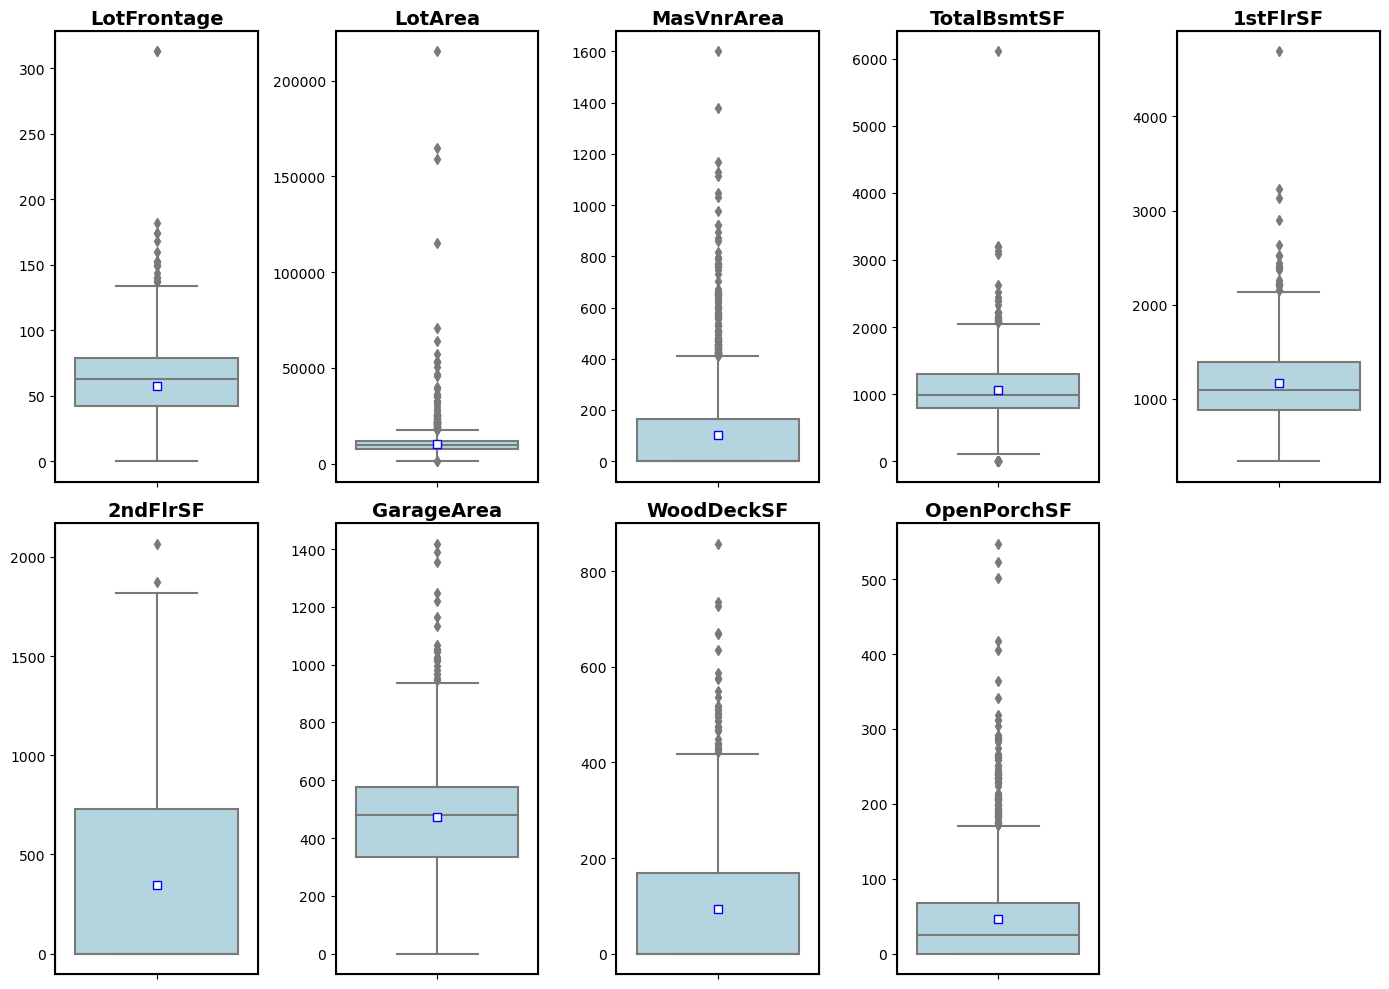

In [219]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize = [14,10])
for i in range(len(cols)):
    plt.subplot(2,5,i+1)
    box_plot(cols[i])
plt.tight_layout()

In [220]:
 #Removing Outliers from data

#99th percentile values of few numerical variables with extreme outliers as per box plots
ol_LotArea = housepricing_clean['LotArea'].quantile(0.99)
ol_LotFrontage = housepricing_clean['LotFrontage'].quantile(0.99)
ol_1stFlrSF = housepricing_clean['1stFlrSF'].quantile(0.99)
ol_MasVnrArea = housepricing_clean['MasVnrArea'].quantile(0.99)
ol_TotalBsmtSF = housepricing_clean['TotalBsmtSF'].quantile(0.99)
ol_WoodDeckSF = housepricing_clean['WoodDeckSF'].quantile(0.99)
ol_OpenPorchSF = housepricing_clean['OpenPorchSF'].quantile(0.99)

# Removing values beyond 99% for these variables
housepricing_clean = housepricing_clean[~((housepricing_clean["LotArea"] > ol_LotArea) | (housepricing_clean["LotFrontage"] > ol_LotFrontage) | (housepricing_clean["1stFlrSF"] > ol_1stFlrSF) | (housepricing_clean["MasVnrArea"] > ol_MasVnrArea) |
        (housepricing_clean["TotalBsmtSF"] > ol_TotalBsmtSF) | (housepricing_clean["WoodDeckSF"] > ol_WoodDeckSF) | (housepricing_clean["OpenPorchSF"] > ol_OpenPorchSF))]

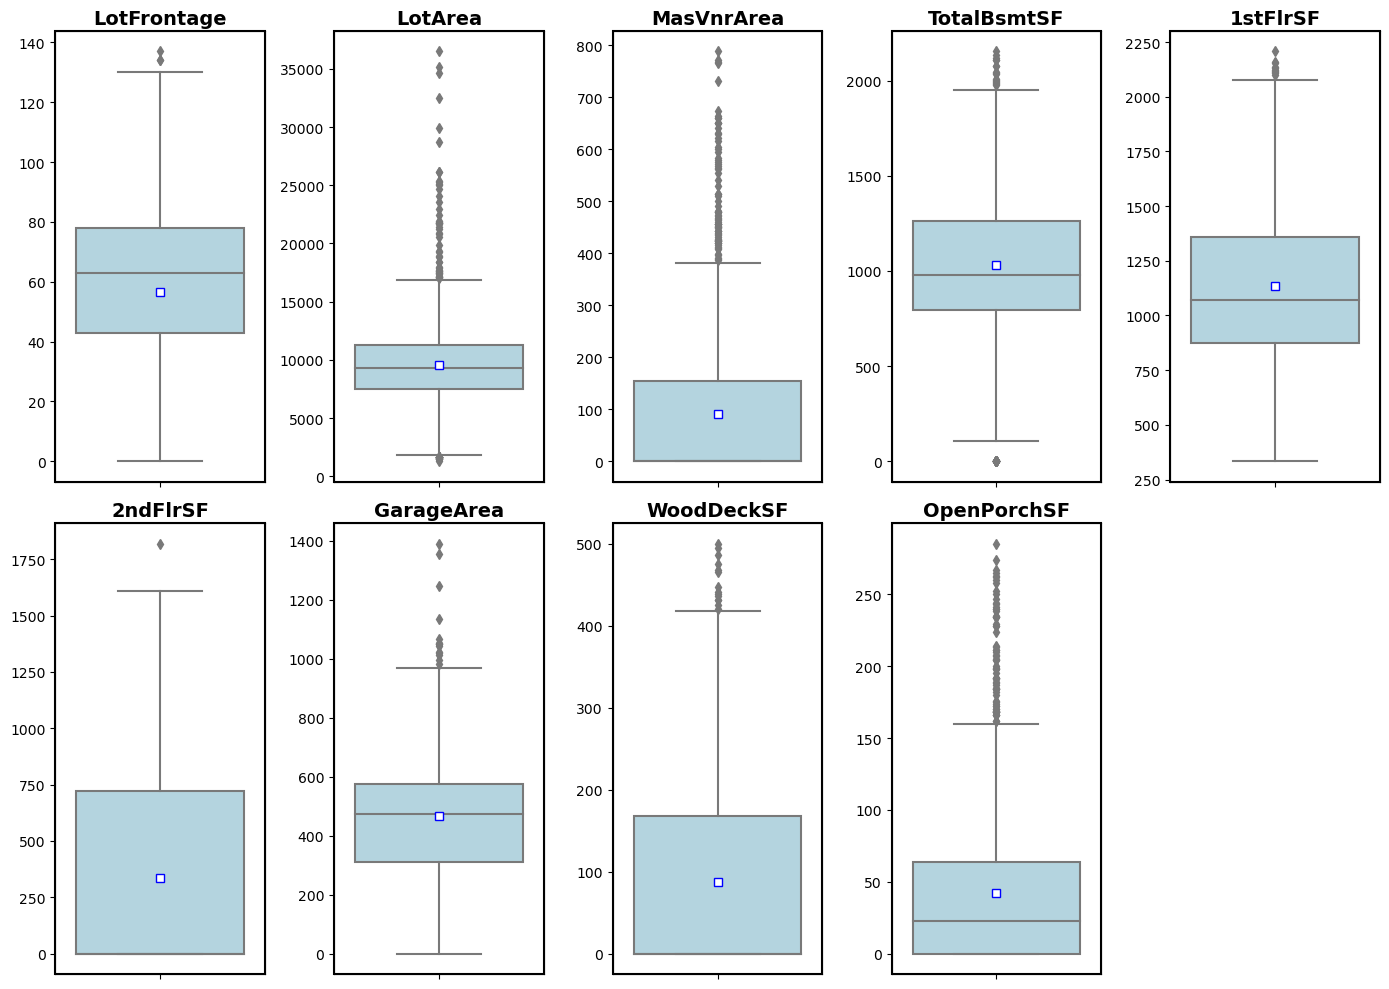

In [221]:
plt.figure(figsize = [14,10])
for i in range(len(cols)):
    plt.subplot(2,5,i+1)
    box_plot(cols[i])
plt.tight_layout()
# as per box plots values are now better and outliers are removed 

In [222]:
#visualizing numerical varibles against SalePrice using scatter plot

#Function for visualizing numerical variables against SalePrice, scatterplot
def scatter_plot(x):
    ax = sns.scatterplot(x = housepricing_clean[x], y = housepricing_clean['SalePrice'], alpha = 0.35, linewidth = 0)
    ax.set_title('{} vs SalePrice'.format(x), fontsize = 12, pad = 5)
       

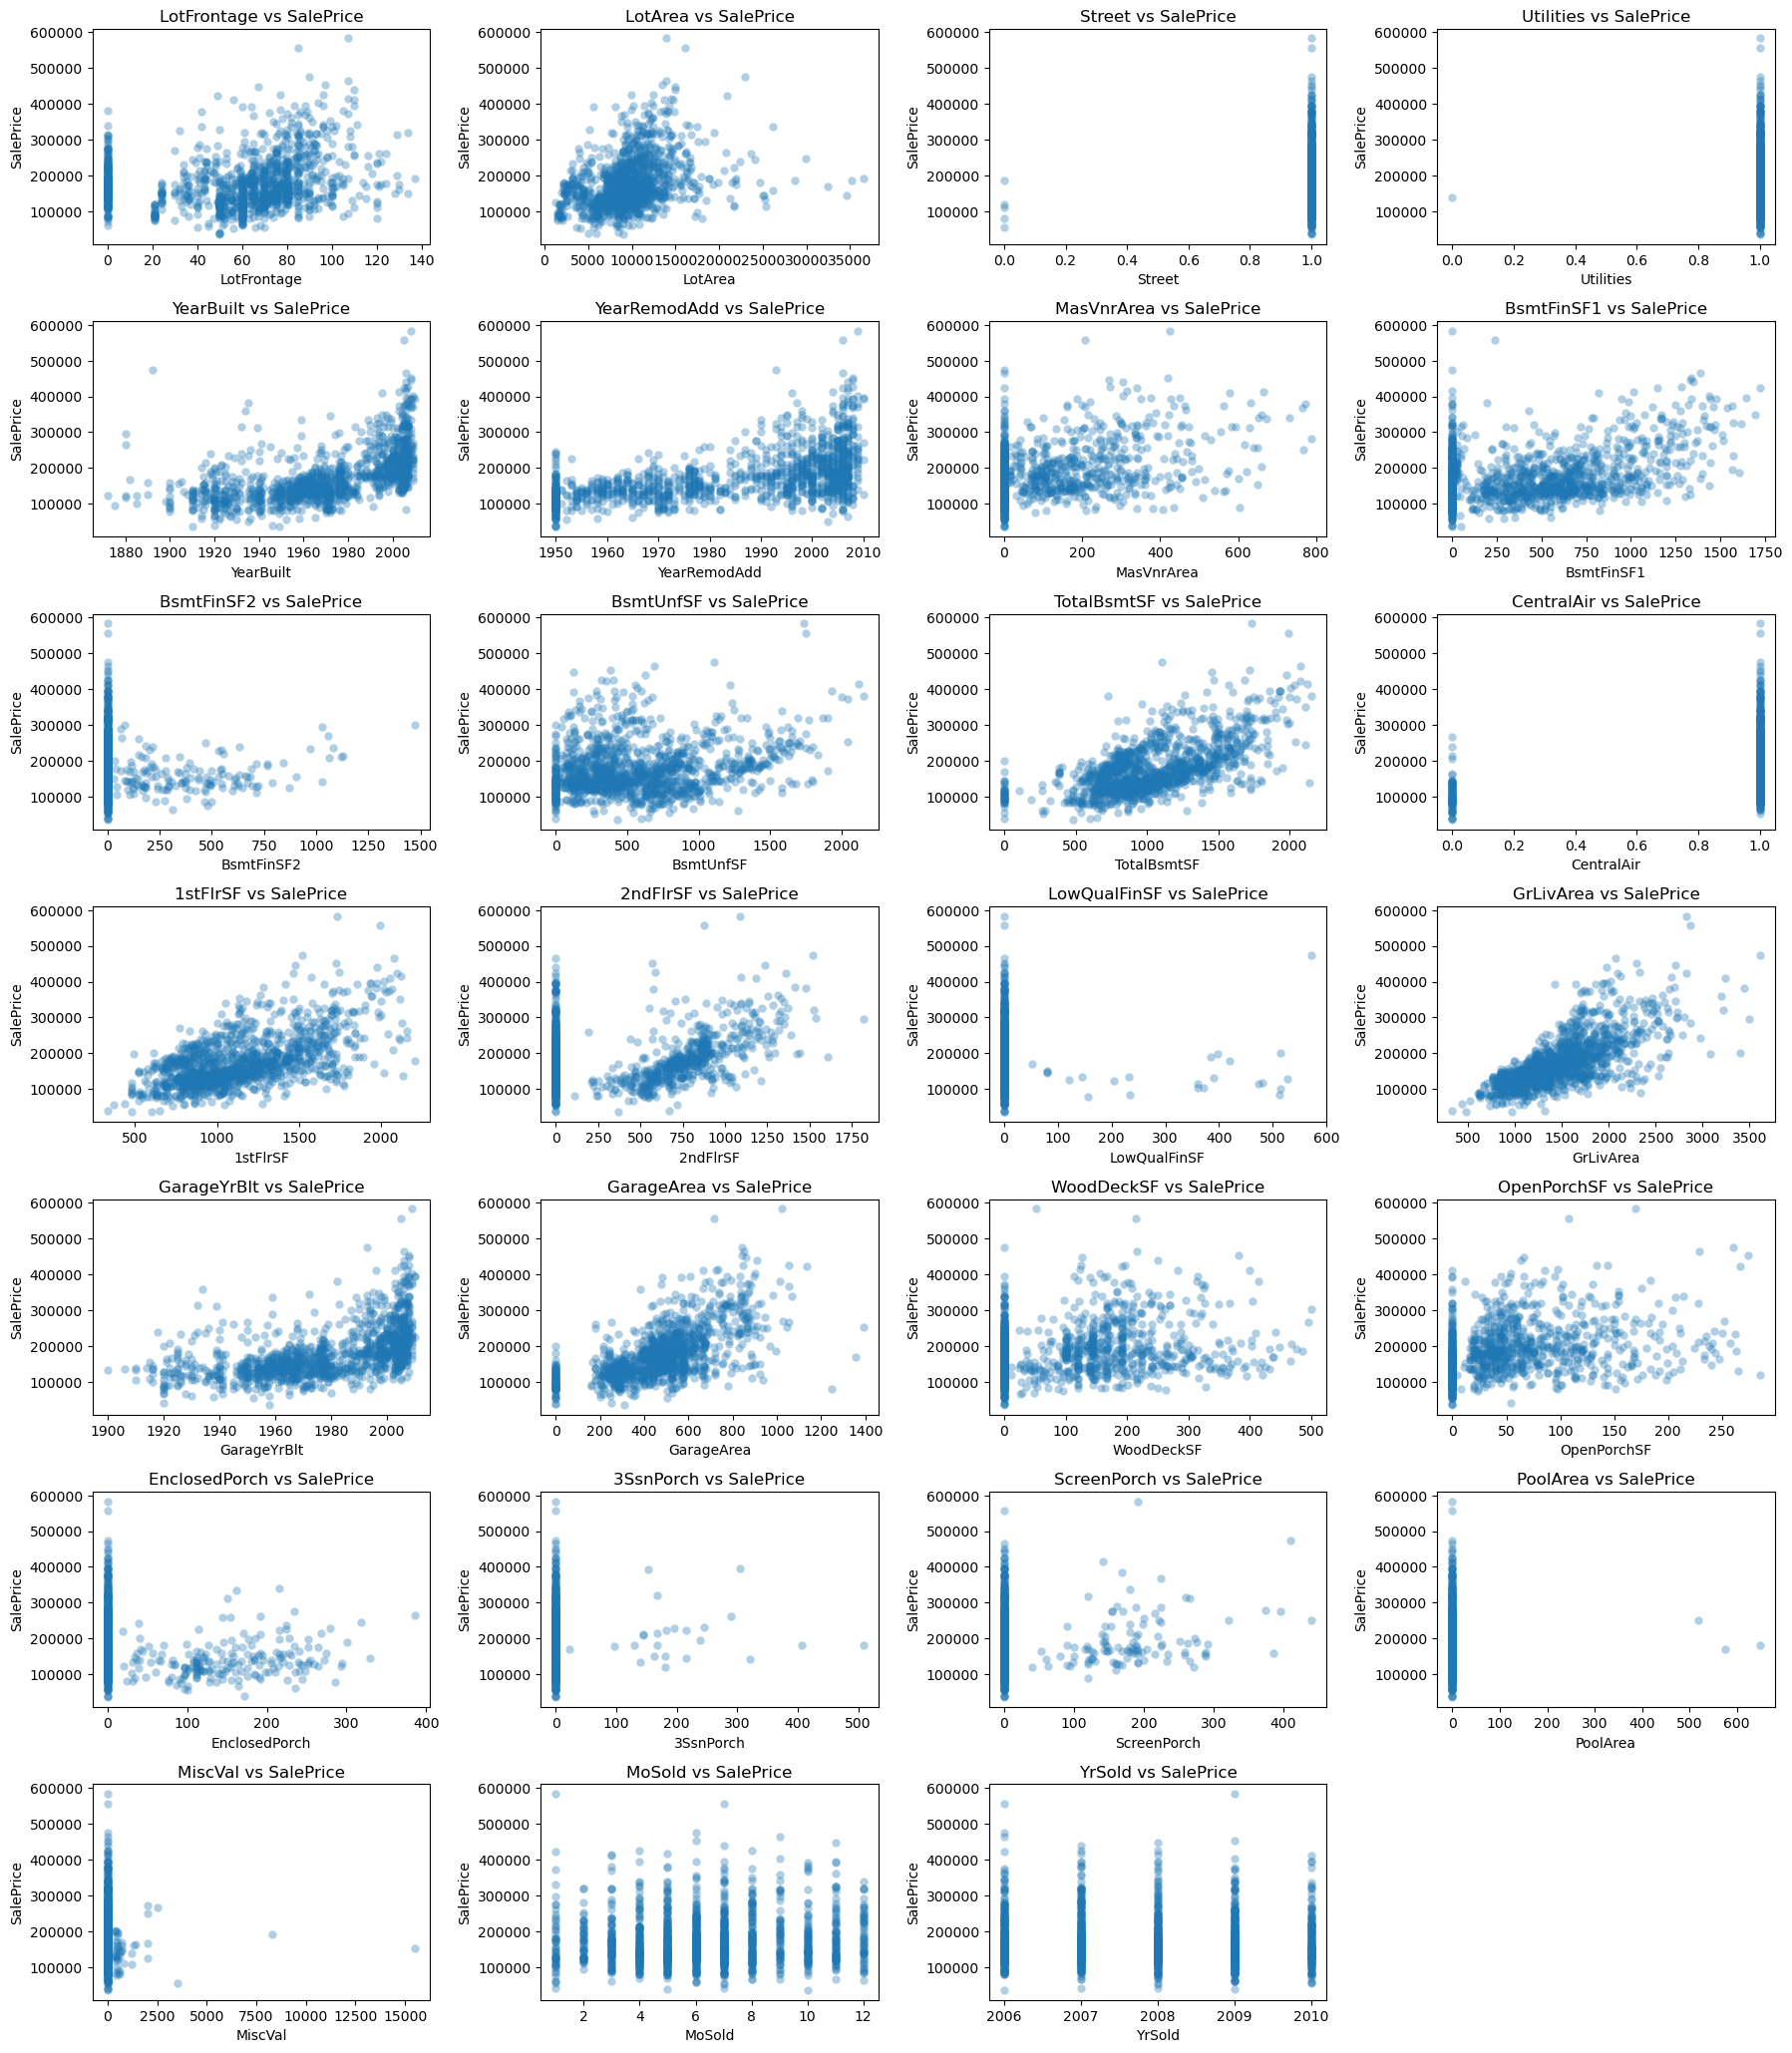

In [223]:
num_cols = [col for col in housepricing_clean.select_dtypes(include = np.number).columns if col != 'SalePrice']

plt.figure(figsize = [18,32])
for i in range(len(num_cols)):
    plt.subplot(11,4, i+1)
    scatter_plot(num_cols[i])
plt.tight_layout()
plt.show()
# data shows that for most variables as sales proce increases value increases hence a increasing trend

In [224]:
#housepricing_clean.info()
#housepricing_clean.head()
# find correlation among them
house_numeric = housepricing_clean.select_dtypes(include=['float64', 'int64'])
#print(num_cols)
#house_numeric = house_numeric(num_cols)
cor = house_numeric.corr()


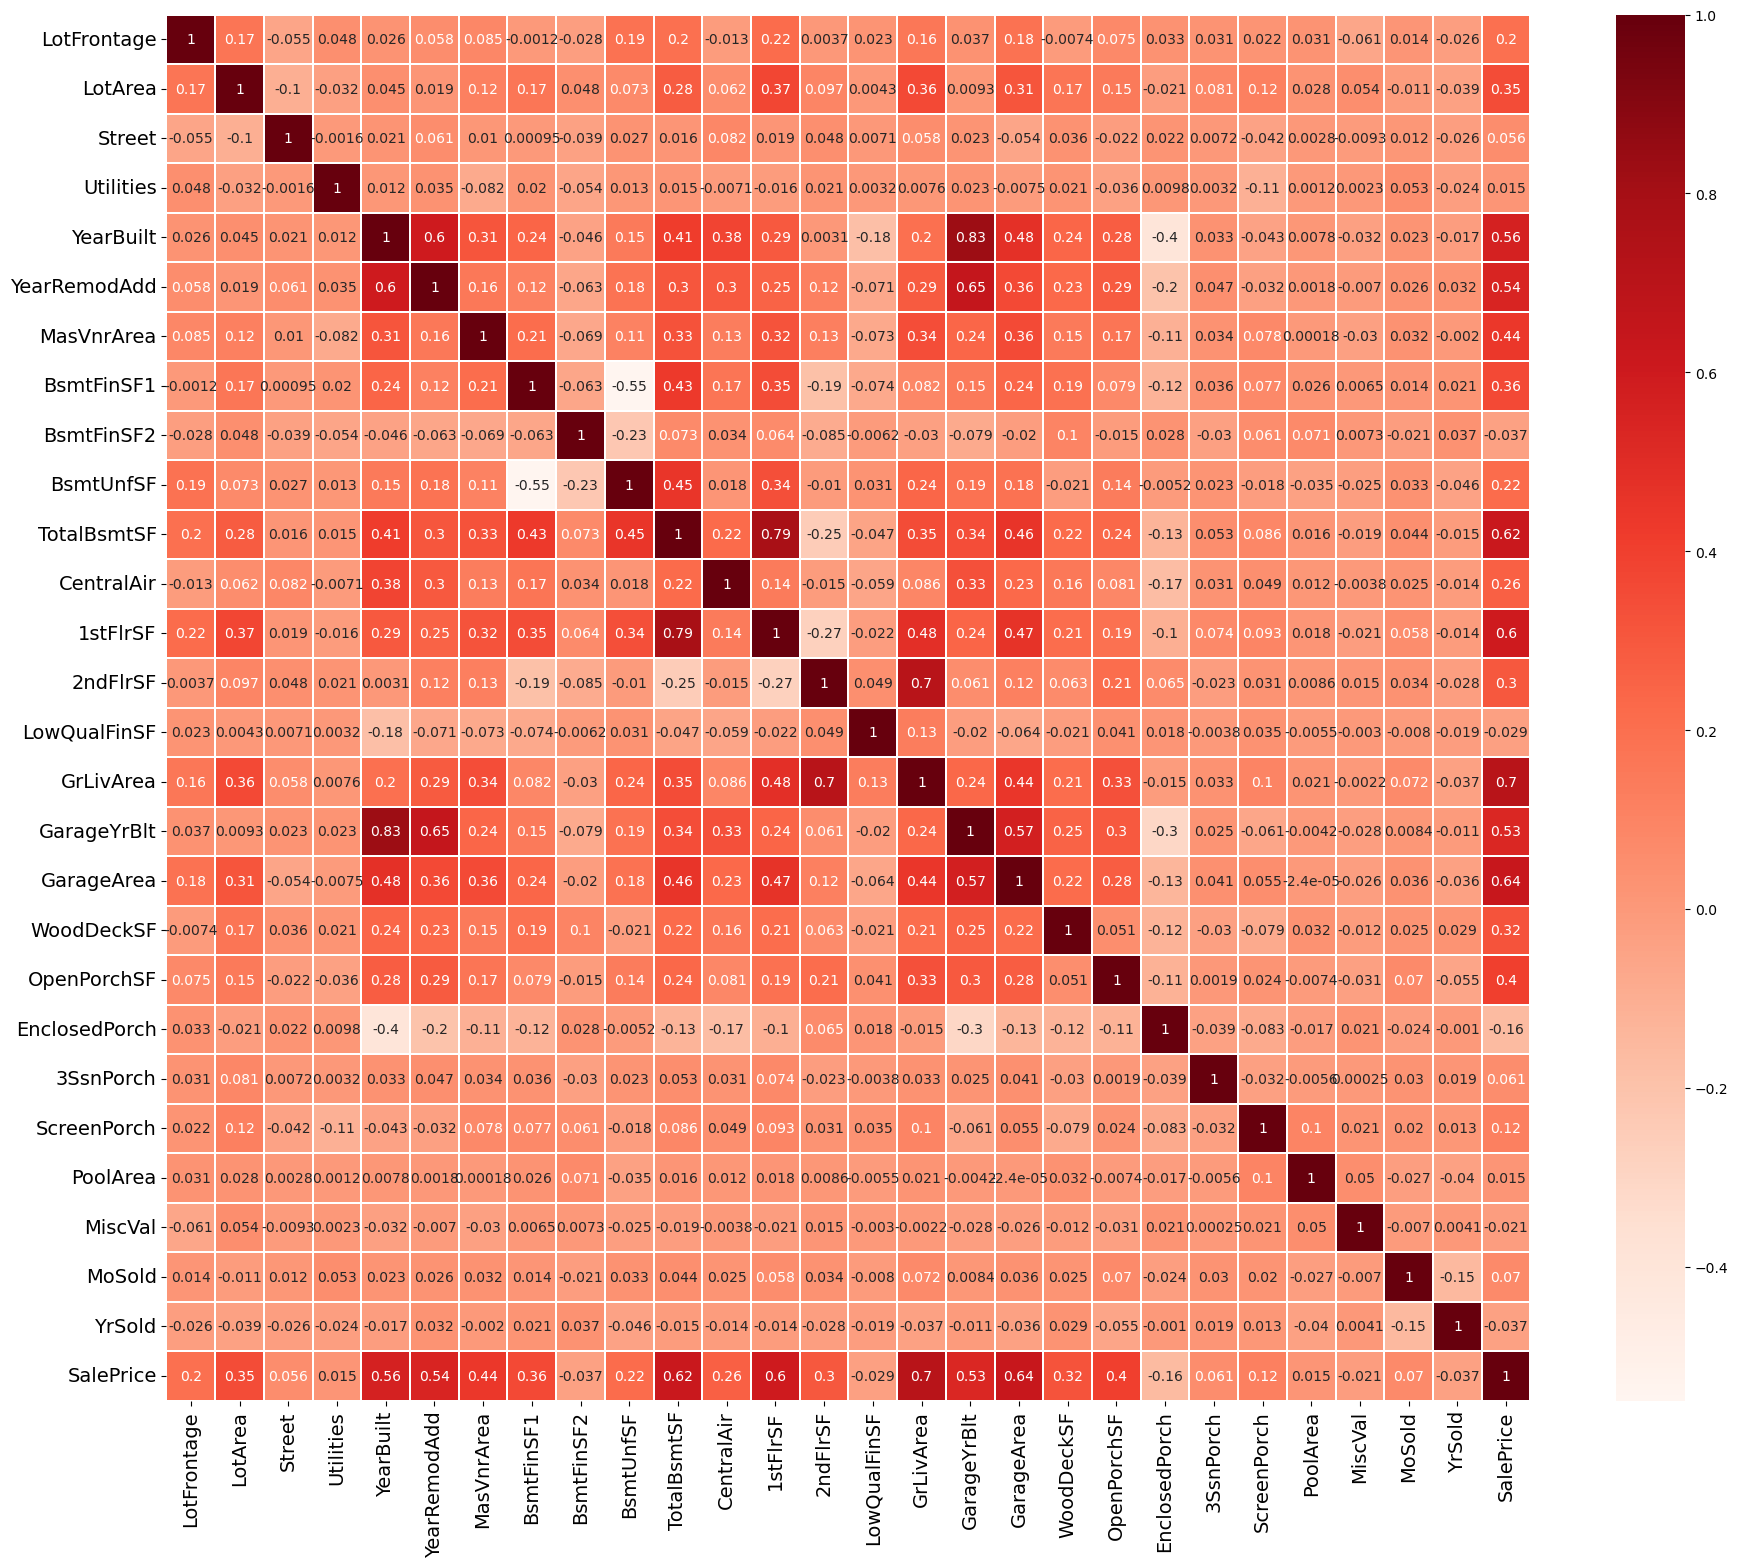

In [225]:
# visualizing correlation between numerical variables

plt.figure(figsize = [22,18])

sns.heatmap(house_numeric.corr(), annot = True, cmap = 'Reds', linecolor = 'w', linewidth = 0.2)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()
# high correlation is shown among variables 

## Prepare Evaluation using this Data

In [226]:
housepricing_clean.head()
housepricing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1382 non-null   object 
 1   MSZoning       1382 non-null   object 
 2   LotFrontage    1382 non-null   float64
 3   LotArea        1382 non-null   int64  
 4   Street         1382 non-null   int64  
 5   Alley          1382 non-null   object 
 6   LotShape       1382 non-null   object 
 7   LandContour    1382 non-null   object 
 8   Utilities      1382 non-null   int64  
 9   LotConfig      1382 non-null   object 
 10  LandSlope      1382 non-null   object 
 11  Neighborhood   1382 non-null   object 
 12  Condition1     1382 non-null   object 
 13  Condition2     1382 non-null   object 
 14  BldgType       1382 non-null   object 
 15  HouseStyle     1382 non-null   object 
 16  OverallQual    1382 non-null   object 
 17  OverallCond    1382 non-null   object 
 18  YearBuilt    

In [227]:

# creating dummy variables for categorical variables
house_categorical = housepricing_clean.select_dtypes(include=['object'])
#house_categorical.head()

In [228]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True).astype(np.int64)
#house_dummies.head()



In [229]:
house_dummies.shape

(1382, 278)

In [230]:
#print(list(house_categorical.columns))
housepricing_clean = housepricing_clean.drop(list(house_categorical.columns), axis=1)
# drop original cat valriables

housepricing_clean.shape

(1382, 28)

In [231]:
housepricing_clean_final = pd.concat([housepricing_clean, house_dummies], axis=1)
housepricing_clean_final.shape
#housepricing_clean_final.head()


(1382, 306)

In [232]:
#housepricing_clean_test = housepricing_clean_final.tail(1459)
# test train split 
# split into train and test
from sklearn.model_selection import train_test_split
housepricing_clean_final_train, housepricing_clean_final_test = train_test_split(housepricing_clean_final, train_size=0.75, test_size = 0.25, random_state=42)
housepricing_clean_final_train.shape , housepricing_clean_final_test.shape

((1036, 306), (346, 306))

In [233]:
#housepricing_clean_final_train.head()
#housepricing_clean_final_test.head()
housepricing_clean_final_train.isnull().sum()[housepricing_clean_final_train.isnull().sum()>0]
housepricing_clean_final_test.isnull().sum()[housepricing_clean_final_test.isnull().sum()>0]
#housepricing_clean_final_train.isna().any()

GarageYrBlt    20
dtype: int64

In [234]:
X = housepricing_clean_final_train
X = X.fillna(X.interpolate())
y = np.log(X.SalePrice)

In [235]:
#X = housepricing_clean_final_train
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.78456116, -0.63115977,  0.05389028, ..., -0.10359395,
        -2.16617351, -0.29511589],
       [ 0.29324346,  3.07825703,  0.05389028, ..., -0.10359395,
         0.46164354, -0.29511589],
       [ 0.73398989,  0.09940604,  0.05389028, ..., -0.10359395,
        -2.16617351, -0.29511589],
       ...,
       [-1.78456116, -1.32315454,  0.05389028, ..., -0.10359395,
         0.46164354, -0.29511589],
       [-0.17898487, -0.89557434,  0.05389028, ..., -0.10359395,
        -2.16617351, -0.29511589],
       [-1.02899584, -1.7773792 ,  0.05389028, ..., -0.10359395,
         0.46164354, -0.29511589]])

In [236]:
housepricing_clean_final_test = housepricing_clean_final_test.fillna(housepricing_clean_final_test.interpolate())
housepricing_clean_final_test.isnull().sum()[housepricing_clean_final_test.isnull().sum()>0]

Series([], dtype: int64)

In [237]:
#housepricing_clean_test = housepricing_clean_test.drop("SalePrice", axis=1)


In [238]:
# Scaling the features
#X1 = housepricing_clean_final_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(housepricing_clean_final_test)

array([[-0.76211051,  0.36264313,  0.07624929, ..., -0.15384615,
         0.46263926, -0.31923475],
       [ 0.28427932, -0.54563727,  0.07624929, ..., -0.15384615,
         0.46263926, -0.31923475],
       [ 0.82332862,  0.47110553,  0.07624929, ..., -0.15384615,
         0.46263926, -0.31923475],
       ...,
       [-1.01578077, -1.98516211,  0.07624929, ..., -0.15384615,
         0.46263926, -0.31923475],
       [ 0.1257354 , -0.238942  ,  0.07624929, ..., -0.15384615,
         0.46263926, -0.31923475],
       [ 1.10870767,  0.26205101,  0.07624929, ..., -0.15384615,
         0.46263926, -0.31923475]])

#### Build Model 

In [241]:
X_train = X.drop('SalePrice', axis = 1) # Feature seperation
y_train = X['SalePrice']
#print(y_train)
X_test = housepricing_clean_final_test.drop('SalePrice', axis = 1)
y_test = housepricing_clean_final_test['SalePrice']
y_train_log = np.log(X['SalePrice'])
y_test_log = np.log(housepricing_clean_final_test['SalePrice'])
#y_test = np.log(dfm_test['SalePrice'])

# re assign the log values to y_train and y_ test after log calc
y_train= y_train_log
y_test=y_test_log
#print(y_train)

In [242]:
#function for building linear regression model using statsmodel api
def build_model(cols):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    # fitting model to data
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

In [243]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:

lr = build_model(X_train.columns)

X_train_lm = sm.add_constant(X_train, has_constant='add')
y_train_pred = lr.predict(X_train_lm)
print('Train R2 score= ', r2_score(y_train, y_train_pred).round(2))

X_test_lm = sm.add_constant(X_test, has_constant='add')
y_pred = lr.predict(X_test_lm)
print('Test R2 score=', r2_score(y_test, y_pred).round(2))

Train R2 score=  0.95
Test R2 score= 0.86


##### As we can see now that R2 Score are having differences for train and test hence they are over fitted and need Ridge and lasso regression analysis

##### Use feature selection using RFE 

In [245]:
from sklearn.feature_selection import RFE
#Eliminating features using RFE
lm = LinearRegression()
selector = RFE(estimator = lm, n_features_to_select = 100)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [247]:
#features selected bt rfe

rfe_cols = X_train.columns[selector.support_]
rfe_cols

Index(['Street', 'CentralAir', 'MSSubClass_30', 'MSSubClass_60',
       'MSSubClass_90', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition2_RRAe', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_3', 'OverallCond_9', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Wd Shng',
       'Foundation_Stone', 'B

In [248]:
L = list(zip(X_train.columns,selector.support_,selector.ranking_))
pd.DataFrame(L, columns = ['Features','rfe_support','rfe_ranking'])[selector.support_].sort_values('rfe_ranking')

,Features,rfe_support,rfe_ranking
2,Street,True,1
241,TotRmsAbvGrd_6,True,1
240,TotRmsAbvGrd_5,True,1
239,TotRmsAbvGrd_4,True,1
238,TotRmsAbvGrd_3,True,1
...,...,...,...
117,OverallCond_3,True,1
115,OverallQual_10,True,1
114,OverallQual_9,True,1
131,RoofMatl_Tar&Grv,True,1


In [249]:

#updated training and test sets
X_train_new = X_train[rfe_cols]
X_test_new = X_test[rfe_cols]

### RIDGE REGRESSION 

In [250]:
# list of alphas to tune using RFE features
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [251]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.11059280733026355


In [252]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['param_alpha'])
#cv_results

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.095105,-0.113894,23
1,0.001,-0.095113,-0.113880,22
2,0.01,-0.095195,-0.113741,21
3,0.05,-0.095524,-0.113220,19
4,0.1,-0.095853,-0.112736,16
5,0.2,-0.096351,-0.112127,14
6,0.3,-0.096741,-0.111759,12
7,0.4,-0.097065,-0.111478,10
8,0.5,-0.097351,-0.111252,8
9,0.6,-0.097613,-0.111059,7


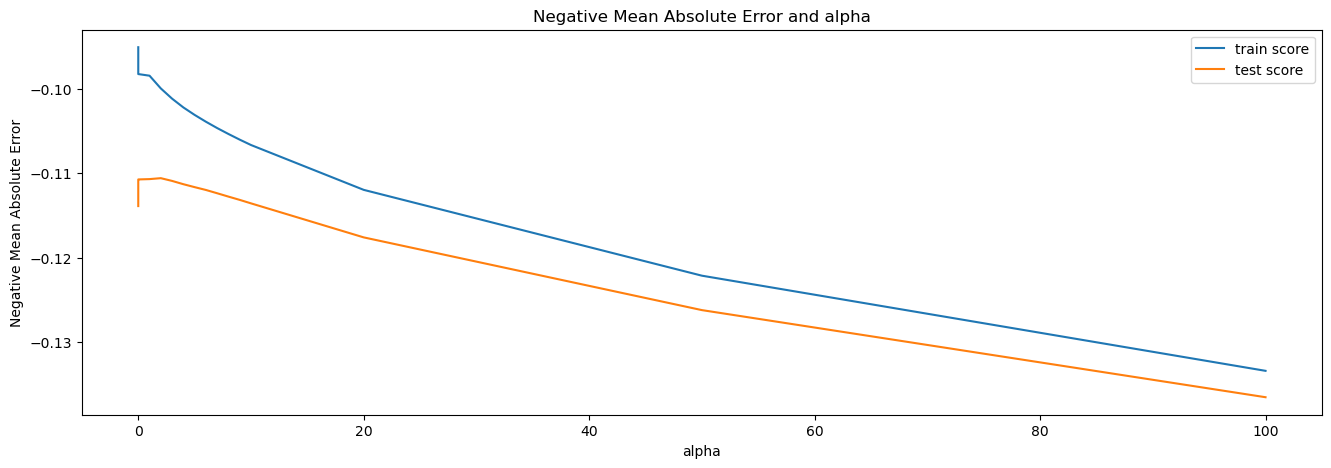

In [253]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [256]:
ridge.coef_

array([ 0.15851146,  0.13280851, -0.12956103,  0.12678691, -0.01927072,
       -0.13854959,  0.23495367,  0.16510355,  0.16323435,  0.08141524,
        0.19383582,  0.09178461,  0.11778762,  0.17548604,  0.07784264,
       -0.00622168, -0.01927072,  0.0244605 , -0.09309177, -0.09424774,
       -0.22620403, -0.15769004, -0.06586334, -0.01428981,  0.08075681,
        0.20737273,  0.33040699,  0.28222833, -0.18354216,  0.08719546,
       -0.01286075, -0.11832289,  0.01568441,  0.08625697,  0.07918128,
       -0.0061211 , -0.04381791,  0.02024645,  0.01650509, -0.06491029,
       -0.01669552,  0.08264451,  0.01650509, -0.01669552, -0.03474377,
       -0.08743547,  0.09656436, -0.03394747, -0.03394747, -0.06416456,
        0.11618904, -0.03394747, -0.07355724, -0.03394747,  0.04153539,
        0.09388226, -0.177131  ,  0.07114061, -0.05734187, -0.01757393,
       -0.06416456,  0.08975361,  0.06716225, -0.03086393, -0.12599254,
        0.11289072,  0.1033706 , -0.09004748, -0.05701492, -0.10

In [257]:
ridge_df = pd.DataFrame({'Features': ridge.feature_names_in_, 'Coefficients': ridge.coef_})
ridge_df.sort_values('Coefficients', ascending = False)
# as we can see there are lot of variables where correlation is there and Ridge does not provide feature selecation 
# hence lets use Lasso

,Features,Coefficients
26,OverallQual_9,0.330407
27,OverallQual_10,0.282228
6,MSZoning_FV,0.234954
25,OverallQual_8,0.207373
78,TotRmsAbvGrd_12,0.199848
...,...,...
21,OverallQual_4,-0.157690
80,Functional_Maj2,-0.176253
56,Heating_Grav,-0.177131
28,OverallCond_3,-0.183542


### LASSO REGRESSION

In [258]:
# list of Lambdas which is referred as alpha to tune

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [259]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [260]:
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df = cv_df[cv_df['param_alpha'] < 10]
cv_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['param_alpha'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.00001,-0.095367,-0.113547,2
1,0.0001,-0.097674,-0.111375,1
2,0.001,-0.107399,-0.115925,3
3,0.01,-0.149372,-0.152601,4
4,0.05,-0.232212,-0.232730,5
5,0.1,-0.289180,-0.289372,6
6,0.2,-0.305874,-0.305998,7
7,0.3,-0.305874,-0.305998,7
8,0.4,-0.305874,-0.305998,7
9,0.5,-0.305874,-0.305998,7


In [262]:
#fine tuning in a tighter range to find the best value of alpha

# list of alphas to tune

params = {'alpha': np.arange(0,0.002,0.00001)}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.00e+00, 1.00e-05, 2.00e-05, 3.00e-05, 4.00e-05, 5.00e-05,
       6.00e-05, 7.00e-05, 8.00e-05, 9.00e-05, 1.00e-04, 1.10e-04,
       1.20e-04, 1.30e-04, 1.40e-04, 1.50e-04, 1.60e-04, 1.70e-04,
       1.80e-04, 1.90e-04, 2.00e-04, 2.10e-04, 2.20e-04, 2.30e-04,
       2.40e-04, 2.50e-04, 2.60e-04, 2.70e-04, 2.80e-04, 2.90e-04,
       3.00e-04, 3.10e-04...
       1.68e-03, 1.69e-03, 1.70e-03, 1.71e-03, 1.72e-03, 1.73e-03,
       1.74e-03, 1.75e-03, 1.76e-03, 1.77e-03, 1.78e-03, 1.79e-03,
       1.80e-03, 1.81e-03, 1.82e-03, 1.83e-03, 1.84e-03, 1.85e-03,
       1.86e-03, 1.87e-03, 1.88e-03, 1.89e-03, 1.90e-03, 1.91e-03,
       1.92e-03, 1.93e-03, 1.94e-03, 1.95e-03, 1.96e-03, 1.97e-03,
       1.98e-03, 1.99e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [263]:
print(model_cv.best_params_)


{'alpha': 0.00011}


In [292]:
# Lasso Model for best param
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new, y_train)

y_train_pred_lasso = lasso.predict(X_train_new)
print('Train R2 Score  = ', round(r2_score(y_train, y_train_pred_lasso),4))
#MAE and RMSE
print('Train MeanAbsErr = ', round(mean_absolute_error(y_train, y_train_pred_lasso),4))
print('Train RMSE  ', round(mean_squared_error(y_train, y_train_pred_lasso, squared = False),4), '\n')

y_test_pred_lasso = lasso.predict(X_test_new)
print('Test R2 Score = ', round(r2_score(y_test, y_test_pred_lasso),4))
#MAE and RMSE
print('Test MeanAbsErr = ', round(mean_absolute_error(y_test, y_test_pred_lasso),4))
print('Test RMSE   =', round(mean_squared_error(y_test, y_test_pred_lasso, squared = False),4))

Train R2 Score  =  0.8848
Train MeanAbsErr =  0.0991
Train RMSE   0.1321 

Test R2 Score =  0.8004
Test MeanAbsErr =  0.115
Test RMSE   = 0.1558


###### Lasso is performing better than Ridge

In [293]:
lasso.coef_

array([ 1.33613910e-01,  1.20373625e-01, -1.28518219e-01,  1.35872199e-01,
       -4.04418709e-02, -1.62974773e-01,  3.87331030e-01,  3.18151278e-01,
        3.07249337e-01,  2.26186921e-01,  2.02567450e-01,  9.98108972e-02,
        1.08570373e-01,  1.82630371e-01,  8.67350585e-02, -0.00000000e+00,
       -2.74295574e-03, -6.61444941e-03, -1.04008318e-01, -0.00000000e+00,
       -7.78791251e-02,  0.00000000e+00,  9.08510329e-02,  1.47723651e-01,
        2.45947556e-01,  3.80110860e-01,  5.27732391e-01,  5.57426338e-01,
       -1.80142357e-01,  8.18850794e-02, -3.43978089e-03, -1.09259129e-01,
        2.21831005e-02,  1.00594457e-01,  1.15065166e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.12503258e-01,
       -0.00000000e+00,  1.29367537e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -9.05278282e-02,  1.30688099e-01, -1.25075006e-01,
       -0.00000000e+00, -9.95441100e-02,  1.12497007e-01, -3.68638537e-03,
       -7.52720980e-02, -

In [297]:
lasso_df = pd.DataFrame({'Features': lasso.feature_names_in_, 'Coefficients': lasso.coef_})
lasso_df = lasso_df[lasso_df.Coefficients != 0].sort_values('Coefficients', ascending = False).reset_index().drop('index', axis = 1)
lasso_df

,Features,Coefficients
0,OverallQual_10,0.557426
1,OverallQual_9,0.527732
2,MSZoning_FV,0.387331
3,OverallQual_8,0.380111
4,MSZoning_RH,0.318151
...,...,...
80,MSSubClass_180,-0.162975
81,OverallCond_3,-0.180142
82,Functional_Sev,-0.240763
83,Functional_Maj2,-0.240954


#### Summary 
###### As we can see now that with Ridge Lambda aka alpha value was 2 and we could not select the features how ever with Lasso we have almost zero Alpha(0.00011) and we can see the above feature selection along with their coefficients